In [19]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tqdm
import cv2
from tensorflow.examples.tutorials.mnist import input_data

In [4]:
data = input_data.read_data_sets('MNIST_data/')

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [5]:
def generator(z , reuse = None):
    with tf.variable_scope('gen' , reuse=reuse):
        hidden1 = tf.layers.dense(inputs=z , units=128)
        hidden1 = tf.nn.leaky_relu(hidden1,alpha=0.01)
        
        hidden2 = tf.layers.dense(inputs=hidden1 , units=128)
        hidden2 = tf.nn.leaky_relu(hidden2,alpha=0.01)
        
        output = tf.layers.dense(hidden2, units = 784 , activation=tf.nn.tanh)
            
        return output
        

In [6]:
def discriminator(x , reuse = None):
    with tf.variable_scope('disc' , reuse=reuse):
        hidden1 = tf.layers.dense(inputs=x , units=128)
        hidden1 = tf.nn.leaky_relu(hidden1,alpha=0.01)
        
        hidden2 = tf.layers.dense(inputs=hidden1 , units=128)
        hidden2 = tf.nn.leaky_relu(hidden2,alpha=0.01)
        
        hidden3 = tf.layers.dense(inputs=hidden2 , units=64)
        hidden3 = tf.nn.leaky_relu(hidden3,alpha=0.01)
        
        
        out = tf.layers.dense(hidden2, units = 1)
        
        output = tf.sigmoid(out)
        
        return output,out

In [7]:
inp_x = tf.placeholder(tf.float32 , shape=[None,784])
inp_z = tf.placeholder(tf.float32 , shape=[None,100])
y_pred = tf.placeholder(tf.float32 , shape=[None,1])

In [9]:
G = generator(inp_z , reuse= False)

In [10]:
D_real,D_logits_real = discriminator(inp_x , reuse=False)
D_fake,D_logits_fake = discriminator(G , reuse=True)

In [11]:
def loss(l_in,l_out):
    loss = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=l_in , labels=l_out))
    return loss

In [12]:
D_real_loss = loss(D_logits_real,tf.ones_like(D_logits_real)*0.9)
D_fake_loss = loss(D_logits_fake,tf.zeros_like(D_logits_fake))
d_loss = D_real_loss + D_fake_loss
G_loss = loss(D_logits_fake,tf.ones_like(D_logits_fake)*0.9)

In [13]:
learning_rate = 0.001

In [14]:
tvars = tf.trainable_variables()
d_vars = [var for var in tvars if 'dis' in var.name]
g_vars = [var for var in tvars if 'gen' in var.name]

In [15]:
d_vars

[<tf.Variable 'disc/dense/kernel:0' shape=(784, 128) dtype=float32_ref>,
 <tf.Variable 'disc/dense/bias:0' shape=(128,) dtype=float32_ref>,
 <tf.Variable 'disc/dense_1/kernel:0' shape=(128, 128) dtype=float32_ref>,
 <tf.Variable 'disc/dense_1/bias:0' shape=(128,) dtype=float32_ref>,
 <tf.Variable 'disc/dense_2/kernel:0' shape=(128, 64) dtype=float32_ref>,
 <tf.Variable 'disc/dense_2/bias:0' shape=(64,) dtype=float32_ref>,
 <tf.Variable 'disc/dense_3/kernel:0' shape=(128, 1) dtype=float32_ref>,
 <tf.Variable 'disc/dense_3/bias:0' shape=(1,) dtype=float32_ref>]

In [16]:
D_train = tf.train.AdamOptimizer(learning_rate).minimize(d_loss,var_list = d_vars)

In [17]:
G_train = tf.train.AdamOptimizer(learning_rate).minimize(G_loss , var_list = g_vars)

In [51]:
init = tf.global_variables_initializer()

epochs = 100
batch_size = 100
samples = []

with tf.Session() as sess:
    sess.run(init)
    
    for i in tqdm.tqdm(range(epochs)):
        
        num_batches = data.train.num_examples//batch_size
        
        for i in range(num_batches):
            
            batch = data.train.next_batch(batch_size)
            batch_images = batch[0].reshape((batch_size,784))
            batch_images = batch_images*2 - 1
            
            batch_z  = np.random.uniform(-1,1,size=(batch_size,100)) 
            
            _  = sess.run(D_train , feed_dict = {inp_x : batch_images  , inp_z : batch_z})
            _  = sess.run(G_train , feed_dict = {inp_z:batch_z}) 
        
        sample_z = np.random.uniform(-1, 1, size=(1, 100))
        gen_sample = sess.run(generator(inp_z ,reuse=True),feed_dict={inp_z: sample_z})
        samples.append(gen_sample)
        saver.save(sess,'model/model200')


100%|██████████| 1/1 [00:01<00:00,  1.88s/it]


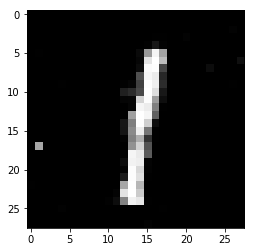

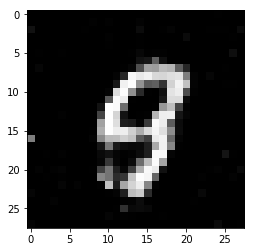

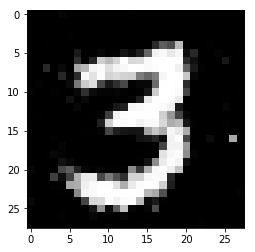

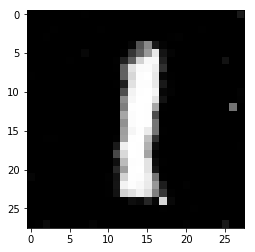

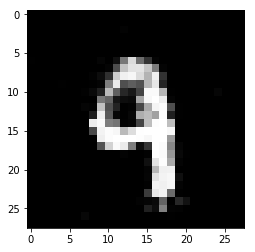

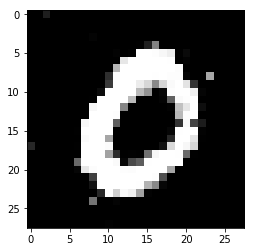

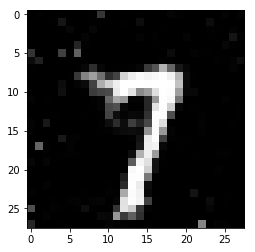

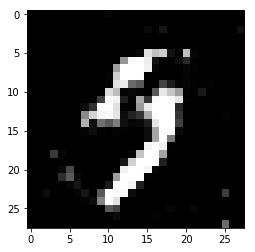

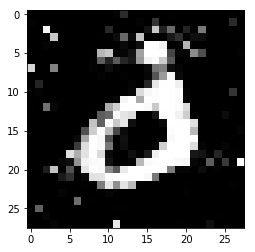

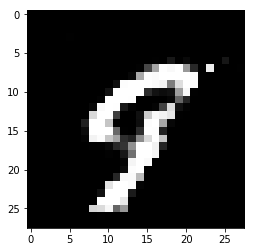

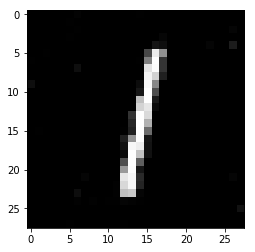

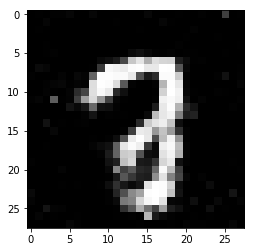

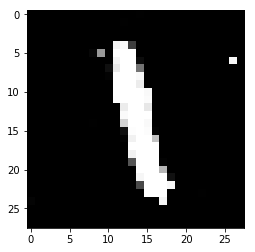

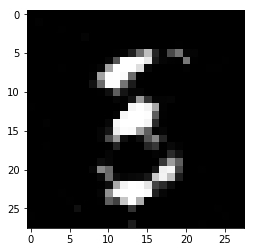

In [53]:
for i in range(85,99):
    plt.imshow(samples[i].reshape(28,28) , cmap = 'gray')
    plt.show()